<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/2interacting%20vortex_in_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

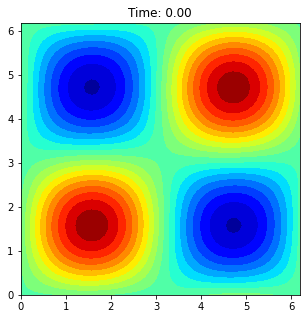

<ipython-input-8-306977ab346f>:43: RuntimeWarning: overflow encountered in multiply
  u_omega = np.fft.ifft2(np.fft.fftn(u)*np.fft.fftn(omega)).real
<ipython-input-8-306977ab346f>:44: RuntimeWarning: overflow encountered in multiply
  v_omega = np.fft.ifft2(np.fft.fftn(v)*np.fft.fftn(omega)).real
<ipython-input-8-306977ab346f>:47: RuntimeWarning: overflow encountered in square
  omega_new = omega - dt*(u_omega + v_omega) + dt*nu*(np.fft.ifft2(-np.fft.fftn(omega)*(np.fft.fftn(u)**2 + np.fft.fftn(v)**2)).real)
<ipython-input-8-306977ab346f>:47: RuntimeWarning: invalid value encountered in multiply
  omega_new = omega - dt*(u_omega + v_omega) + dt*nu*(np.fft.ifft2(-np.fft.fftn(omega)*(np.fft.fftn(u)**2 + np.fft.fftn(v)**2)).real)
/usr/local/lib/python3.8/dist-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.8/dist-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
nu = 0.1 # Viscosity
N = 64 # Number of grid points
L = 2*np.pi # Length of the domain
dx = L/N # Grid spacing
dt = 0.001 # Time step
T = 100 # Total time

# Initialize velocity and vorticity fields
u = np.zeros((N,N))
v = np.zeros((N,N))
omega = np.zeros((N,N))

# Initialize coordinates
x = np.linspace(0,L-dx,N)
y = np.linspace(0,L-dx,N)
X,Y = np.meshgrid(x,y)

# Define initial vortices
gamma1 = 10
gamma2 = 10
x0 = L/4
y0 = L/4
x1 = 3*L/4
y1 = 3*L/4

omega = gamma1*np.exp(-((X-x0)**2 + (Y-y0)**2)/2) + gamma2*np.exp(-((X-x1)**2 + (Y-y1)**2)/2)

# Set up figure
fig, ax = plt.subplots(figsize=(5,5))
ax.set(xlim=(0,L), ylim=(0,L))

# Define function for time evolution
def evolve(omega, u, v, dt, dx, nu):
    # Compute velocity field
    u = np.fft.fft2(-1j*np.fft.fftn(omega))/(N**2)
    v = np.fft.fft2(1j*np.fft.fftn(omega))/(N**2)
    
    # Compute nonlinear terms
    u_omega = np.fft.ifft2(np.fft.fftn(u)*np.fft.fftn(omega)).real
    v_omega = np.fft.ifft2(np.fft.fftn(v)*np.fft.fftn(omega)).real
    
    # Update vorticity
    omega_new = omega - dt*(u_omega + v_omega) + dt*nu*(np.fft.ifft2(-np.fft.fftn(omega)*(np.fft.fftn(u)**2 + np.fft.fftn(v)**2)).real)
    
    return omega_new, u, v

# Time evolution loop
for t in range(int(T/dt)):
    omega, u, v = evolve(omega, u, v, dt, dx, nu)
    ax.clear()
    ax.contourf(X,Y,omega,20,cmap=plt.cm.jet)
    ax.set_title('Time: %.2f' % (t*dt))
    plt.pause(0.001)
    
plt.show()


